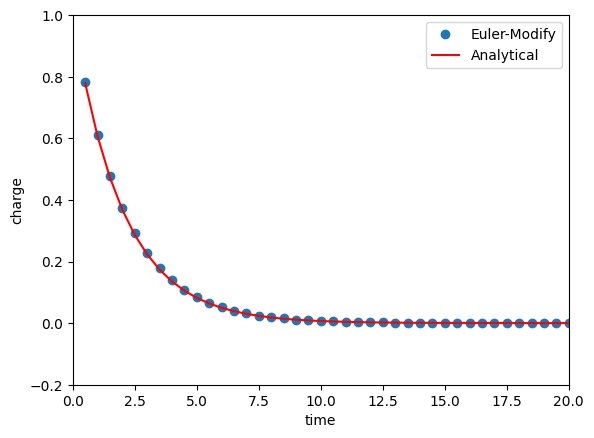

In [1]:
# eg.1
import numpy as np
import matplotlib.pyplot as plt
rc = 2.0 #设置常数
dt = 0.5 #设置步长
n = 1000 #设置分割段数
t = 0.0 #设置初始时间
q = 1.0 #设置初始电量
#先定义三个空列表
qt=[] #用来盛放差分得到的q值
qt0=[] #用来盛放解析得到的q值
time = [] #用来盛放时间值
for i in range(n):
    t = t + dt
    q1 = q - q*dt/rc #qn+1的近似值
    q = q - 0.5*(q1*dt/rc + q*dt/rc) #差分递推关系
    q0 = np.exp(-t/rc) #解析关系
    qt.append(q) #差分得到的q值列表
    qt0.append(q0) #解析得到的q值列表
    time.append(t) #时间列表
plt.plot(time,qt,'o',label='Euler-Modify') #差分得到的电量随时间的变化
plt.plot(time,qt0,'r-',label='Analytical') #解析得到的电量随时间的变化
plt.xlabel('time')
plt.ylabel('charge')
plt.xlim(0,20)
plt.ylim(-0.2,1.0)
plt.legend(loc='upper right')
plt.show()

In [2]:
# eg.2.
import numpy as np
import matplotlib.pyplot as plt

h = 0.1#空间步长
N =30#空间步数
dt = 0.0001#时间步长
M = 10000#时间的步数
A = dt/(h**2) #lambda*tau/h^2
U = np.zeros([N+1,M+1])#建立二维空数组
Space = np.arange(0,(N+1)*h,h)#建立空间等差数列，从0到3，公差是h

#边界条件
for k in np.arange(0,M+1):
    U[0,k] = 0.0
    U[N,k] = 0.0

#初始条件
for i in np.arange(0,N):
    U[i,0]=4*i*h*(3-i*h)

#递推关系
for k in np.arange(0,M):
    for i in np.arange(1,N):
        U[i,k+1]=A*U[i+1,k]+(1-2*A)*U[i,k]+A*U[i-1,k]

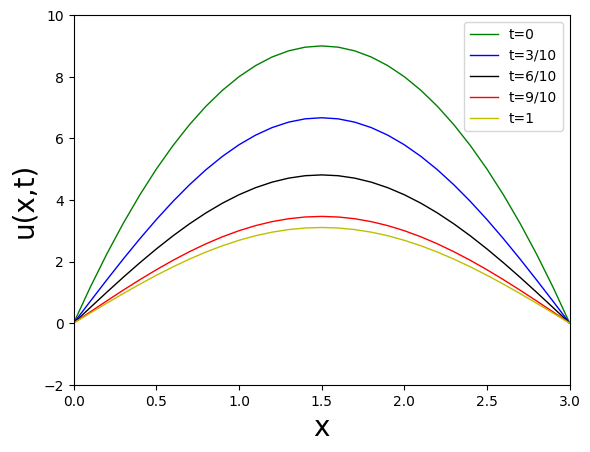

In [3]:
#不同时刻的温度随空间坐标的变化
plt.plot(Space,U[:,0], 'g-', label='t=0',linewidth=1.0)
plt.plot(Space,U[:,3000], 'b-', label='t=3/10',linewidth=1.0)
plt.plot(Space,U[:,6000], 'k-', label='t=6/10',linewidth=1.0)
plt.plot(Space,U[:,9000], 'r-', label='t=9/10',linewidth=1.0)
plt.plot(Space,U[:,10000], 'y-', label='t=1',linewidth=1.0)
plt.ylabel('u(x,t)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.xlim(0,3)
plt.ylim(-2,10)
plt.legend(loc='upper right')
plt.show()

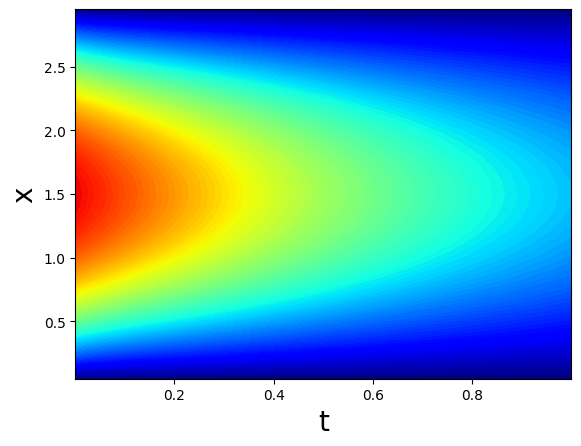

In [4]:
#温度等高线随时空坐标的变化，温度越高，颜色越偏红
extent = [0,1,0,3]#时间和空间的取值范围
levels = np.arange(0,10,0.1)#温度等高线的变化范围0-10，变化间隔为0.1
plt.contourf(U,levels,origin='lower',extent=extent,cmap=plt.cm.jet)
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.show()

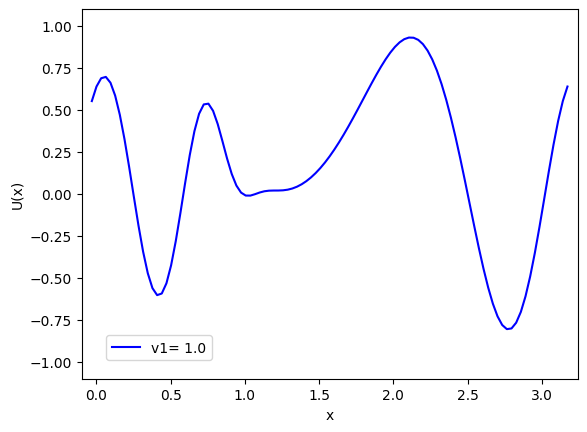

In [1]:
# eg.3. 
import numpy as np
import matplotlib.pyplot as plt
# 初始条件函数 U(x,0)
def funcUx0(x, p): 
    u0 = np.sin(2 * (x-p)**2)
    return u0
# 输入参数
v1 = 1.0  # 平流方程参数，系统速度
p = 0.25  # 初始条件函数 u(x,0) 中的参数
tc = 0  # 开始时间
te = 1.0  # 终止时间: (0, te)
xa = 0.0  # 空间范围: (xa, xb)
xb = np.pi
dt = 0.02  # 时间差分步长
nNodes = 100  # 空间网格数
# 初始化
nsteps = round(te/dt)
dx = (xb - xa) / nNodes
x = np.arange(xa-dx, xb+2*dx, dx)
ux0 = funcUx0(x, p)
u = ux0.copy()  # u(j)
ujp = ux0.copy()  # u(j+1)
# 时域差分
for i in range(nsteps):
    plt.clf()  # 清除当前 figure 的所有axes, 但是保留当前窗口
    # 计算 u(j+1)
    for j in range(nNodes + 2):
        ujp[j] = u[j] - (v1 * dt/dx) * (u[j] - u[j-1])
    # 更新边界条件
    u = ujp.copy()
    u[0] = u[nNodes + 1]
    u[nNodes+2] = u[1]
    tc += dt
    # 绘图
plt.plot(x, u, 'b-', label="v1= 1.0")
plt.axis((xa-0.1, xb + 0.1, -1.1, 1.1))
plt.xlabel("x")
plt.ylabel("U(x)")
plt.legend(loc=(0.05,0.05))
plt.show()


dt = 0.01, dx = 0.02, dy = 0.02, r = 0.50


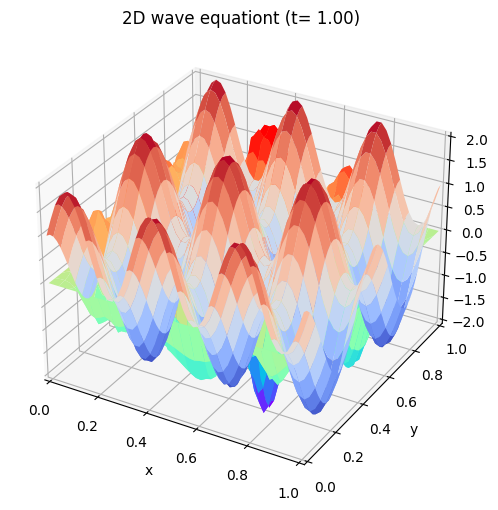

In [2]:
# eg.4
# 4. 二维波动方程（双曲型二阶偏微分方程）
# p2u/pt2 = c^2*(p2u/px2+p2u/py2)

import numpy as np
import matplotlib.pyplot as plt

# 模型参数
c = 1.0  # 波的传播速率
tc, te = 0.0, 1.0  # 时间范围，0<t<te
xa, xb = 0.0, 1.0  # 空间范围，xa<x<xb
ya, yb = 0.0, 1.0  # 空间范围，ya<y<yb

# 初始化
c2 = c*c  # 方程参数
dt = 0.01  # 时间步长
dx = dy = 0.02  # 空间步长
tNodes = round(te/dt)  # t轴 时序网格数
xNodes = round((xb-xa)/dx)  # x轴 空间网格数
yNodes = round((yb-ya)/dy)  # y轴 空间网格数
tZone = np.arange(0, (tNodes+1)*dt, dt)  # 建立空间网格
xZone = np.arange(0, (xNodes+1)*dx, dx)  # 建立空间网格
yZone = np.arange(0, (yNodes+1)*dy, dy)  # 建立空间网格
xx, yy = np.meshgrid(xZone, yZone)  # 生成网格点的坐标 xx,yy (二维数组)

# 步长比检验(r>1 则算法不稳定)
r = 4 * c2 * dt*dt / (dx*dx+dy*dy)
print("dt = {:.2f}, dx = {:.2f}, dy = {:.2f}, r = {:.2f}".format(dt,dx,dy,r))
assert r < 1.0, "Error: r>1, unstable step ratio of dt2/(dx2+dy2) ."
rx = c*c * dt**2/dx**2
ry = c*c * dt**2/dy**2

# 绘图
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection='3d')
# ax2 = fig.add_subplot(122, projection='3d')

# 计算初始值
U = np.zeros([tNodes+1, xNodes+1, yNodes+1])  # 建立三维数组
U[0] = np.sin(6*np.pi*xx)+np.cos(4*np.pi*yy)  # U[0,:,:]
U[1] = np.sin(6*np.pi*xx)+np.cos(4*np.pi*yy)  # U[1,:,:]
surf = ax1.plot_surface(xx, yy, U[0,:,:], rstride=2, cstride=2, cmap=plt.cm.coolwarm)
# wframe = ax2.plot_wireframe(xx, yy, U[0], rstride=2, cstride=2, linewidth=1)

# 有限差分法求解
for k in range(2,tNodes+1):
    for i in range(1,xNodes):
        for j in range(1,yNodes):
            U[k,i,j] = rx*(U[k-1,i-1,j]+U[k-1,i+1,j]) + ry*(U[k-1,i,j-1]+U[k-1,i,j+1])\
                     + 2*(1-rx-ry)*U[k-1,i,j] -U[k-2,i,j]

surf = ax1.plot_surface(xx, yy, U[k,:,:], rstride=2, cstride=2, cmap='rainbow')
    # wframe = ax2.plot_wireframe(xx, yy, U[k,:,:], rstride=2, cstride=2, linewidth=1, cmap='rainbow')
ax1.set_xlim3d(0, 1.0)
ax1.set_ylim3d(0, 1.0)
ax1.set_zlim3d(-2, 2)
ax1.set_title("2D wave equationt (t= %.2f)" % (k*dt))
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.show()


t=0.00s	Tmax=25.1  Tmin=15.0
t=0.20s	Tmax=30.4  Tmin=15.0
t=0.40s	Tmax=34.0  Tmin=15.0
t=0.60s	Tmax=36.9  Tmin=15.0
t=0.80s	Tmax=39.3  Tmin=15.0
t=1.00s	Tmax=41.1  Tmin=15.0
t=1.20s	Tmax=42.4  Tmin=15.0
t=1.40s	Tmax=43.4  Tmin=15.0
t=1.60s	Tmax=44.1  Tmin=15.0
t=1.80s	Tmax=44.6  Tmin=15.0
t=2.00s	Tmax=45.0  Tmin=15.0
t=2.20s	Tmax=45.3  Tmin=15.0
t=2.40s	Tmax=45.5  Tmin=15.0
t=2.60s	Tmax=45.6  Tmin=15.0
t=2.80s	Tmax=45.8  Tmin=15.0
t=3.00s	Tmax=45.8  Tmin=15.0
t=3.20s	Tmax=45.9  Tmin=15.0
t=3.40s	Tmax=46.0  Tmin=15.0
t=3.60s	Tmax=46.0  Tmin=15.0
t=3.80s	Tmax=46.0  Tmin=15.0
t=4.00s	Tmax=46.0  Tmin=15.0
t=4.20s	Tmax=46.0  Tmin=15.0
t=4.40s	Tmax=46.1  Tmin=15.0
t=4.60s	Tmax=46.1  Tmin=15.0
t=4.80s	Tmax=46.1  Tmin=15.0
t=5.00s	Tmax=46.1  Tmin=15.0


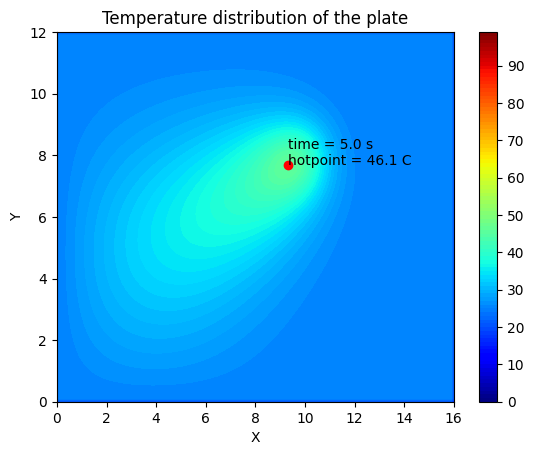

In [3]:
# eg.5
# 5. 二维热传导方程（抛物型二阶偏微分方程）
# pu/p2 = c*(p2u/px2+p2u/py2)

import numpy as np
import matplotlib.pyplot as plt
def showcontourf(zMat, xyRange, tNow):  # 绘制等温云图
    x = np.linspace(xyRange[0], xyRange[1], zMat.shape[1])
    y = np.linspace(xyRange[2], xyRange[3], zMat.shape[0])
    xx,yy = np.meshgrid(x,y)
    zMax = np.max(zMat)
    yMax, xMax = np.where(zMat==zMax)[0][0], np.where(zMat==zMax)[1][0]
    levels = np.arange(0,100,1)
    showText = "time = {:.1f} s\nhotpoint = {:.1f} C".format(tNow, zMax)

    plt.plot(x[xMax],y[yMax],'ro')  # 绘制最高温度点
    plt.contourf(xx, yy, zMat, 100, cmap=plt.cm.get_cmap('jet'), origin='lower', levels = levels)
    plt.annotate(showText, xy=(x[xMax],y[yMax]), xytext=(x[xMax],y[yMax]),fontsize=10)
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Temperature distribution of the plate')
    plt.show()

# 模型参数
uIni = 25  # 初始温度值
uBound = 25.0  # 边界条件
c = 1.0  # 热传导参数
qv = 50.0  # 热源功率
x0, y0 = 0.0, 3.0  # 热源初始位置
vx, vy = 2.0, 1.0  # 热源移动速度
# 求解范围
tc, te = 0.0, 5.0  # 时间范围，0<t<te
xa, xb = 0.0, 16.0  # 空间范围，xa<x<xb
ya, yb = 0.0, 12.0  # 空间范围，ya<y<yb

# 初始化
dt = 0.002  # 时间步长
dx = dy = 0.1  # 空间步长
tNodes = round(te/dt)  # t轴 时序网格数
xNodes = round((xb-xa)/dx)  # x轴 空间网格数
yNodes = round((yb-ya)/dy)  # y轴 空间网格数
xyRange = np.array([xa, xb, ya, yb])
xZone = np.linspace(xa, xb, xNodes+1)  # 建立空间网格
yZone = np.linspace(ya, yb, yNodes+1)  # 建立空间网格
xx,yy = np.meshgrid(xZone, yZone)  # 生成网格点的坐标 xx,yy (二维数组)

# 计算 差分系数矩阵 A、B (三对角对称矩阵)，差分系数 rx,ry,ft
A = (-2) * np.eye(xNodes+1, k=0) + (1) * np.eye(xNodes+1, k=-1) + (1) * np.eye(xNodes+1, k=1)
B = (-2) * np.eye(yNodes+1, k=0) + (1) * np.eye(yNodes+1, k=-1) + (1) * np.eye(yNodes+1, k=1)
rx, ry, ft = c*dt/(dx*dx), c*dt/(dy*dy), qv*dt

# 计算 初始值
U = uIni * np.ones((yNodes+1, xNodes+1))  # 初始温度 u0

# 前向欧拉法一阶差分求解
for k in range(tNodes+1):
    t = k * dt  # 当前时间

    # 热源条件
    # (1) 恒定热源：Qv(x0,y0,t) = qv, 功率、位置 恒定
    # Qv = qv
    # (2) 热源功率随时间变化 Qv(x0,y0,t)=f(t)
    # Qv = qv*np.sin(t*np.pi) if t<2.0 else qv
    # (3) 热源位置随时间变化 Qv(x,y,t)=f(x(t),y(t))
    xt, yt = x0+vx*t, y0+vy*t  # 热源位置变化
    Qv = qv * np.exp(-((xx-xt)**2+(yy-yt)**2))  # 热源方程

    # 边界条件
    U[:,0] = U[:,-1] = uBound
    U[0,:] = U[-1,:] = uBound

    # 差分求解
    U = U + rx * np.dot(U,A) + ry * np.dot(B,U) + Qv*dt

    if k % 100 == 0:
        print('t={:.2f}s\tTmax={:.1f}  Tmin={:.1f}'.format(t, np.max(U), np.min(U)))
showcontourf(U, xyRange, k*dt)  # 绘制等温云图

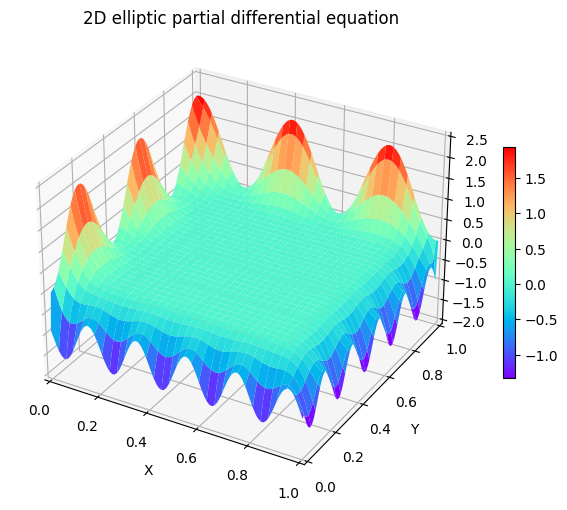

In [4]:
# eg.7
# 7. 二维椭圆方程(Laplace equation)
# u_xx+u_yy=s

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 求解范围
xa, xb = 0.0, 1.0  # 空间范围，xa<x<xb
ya, yb = 0.0, 1.0  # 空间范围，ya<y<yb
# 初始化
h = 0.01  # 空间步长, dx = dy = 0.01
w = 0.5  # 松弛因子
nodes = round((xb-xa)/h)  # x轴 空间网格数
# 边值条件
u = np.zeros((nodes+1, nodes+1))
for i in range(nodes+1):
    u[i, 0] = 1.0 + np.sin(0.5*(i-50)/np.pi)
    u[i, -1] = -1.0 + 0.5*np.sin((i-50)/np.pi)
    u[0, i] = -1.0 + 0.5*np.sin((i-50)/np.pi)
    u[-1, i] = 1.0 + np.sin(0.5*(50-i)/np.pi)
# 迭代松弛法求解
for iter in range(100):
    for i in range(1, nodes):
        for j in range(1, nodes):
            u[i, j] = w/4 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1]) + (1-w) * u[i, j]
# 绘图
x = np.linspace(0, 1, nodes+1)
y = np.linspace(0, 1, nodes+1)
xx, yy = np.meshgrid(x, y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx, yy, u, cmap=plt.get_cmap('rainbow'))
fig.colorbar(surf, shrink=0.5)
ax.set_xlim3d(0, 1.0)
ax.set_ylim3d(0, 1.0)
ax.set_zlim3d(-2, 2.5)
ax.set_title("2D elliptic partial differential equation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()


## 使用Sympy求解微分方程符号解
少数微分方程可以用sympy求解符号解

In [7]:
# eg.7
from sympy.solvers.pde import pdsolve
from sympy import Function, pprint, exp
from sympy.abc import x,y
f = Function('f')
eq = -2*f(x,y).diff(x) + 4*f(x,y).diff(y) + 5*f(x,y) - exp(x + 3*y)
print(pdsolve(eq))

Eq(f(x, y), (F(4*x + 2*y)*exp(x/2) + exp(x + 4*y)/15)*exp(-y))


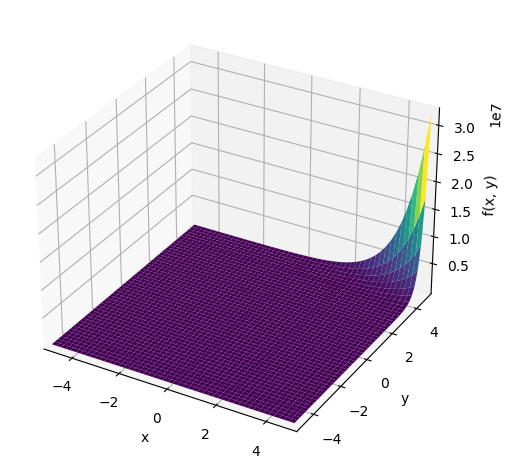

In [23]:
# 单图像
from sympy import symbols
from sympy.plotting import plot3d
from sympy import *
x, y = symbols('x y')
plot3d(exp(x/2-y)+exp(x+3*y)/15, (x, -5, 5), (y, -5, 5))
